Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
      age     bmi smoker      charges  children
0      19  27.900    yes  16884.92400         0
1      18  33.770     no   1725.55230         1
2      28  33.000     no   4449.46200         3
3      33  22.705     no  21984.47061         0
4      32  28.880     no   3866.85520         0
...   ...     ...    ...          ...       ...
1333   50  30.970     no  10600.54830         3
1334   18  31.920     no   2205.98080         0
1335   18  36.850     no   1629.83350         0
1336   21  25.800     no   2007.94500         0
1337   61  29.070    yes  29141.36030         0

[1338 rows x 5 columns]
Matrix: 
            Unnamed: 0       age       bmi   charges  children
Unnamed: 0    1.000000 -0.031467 -0.036169 -0.003373  0.025221
age          -0.031467  1.000000  0.109272  0.299008  0.042469
bmi          -0.036169  0.109272  1.000000  0.198341  0.012759
charge

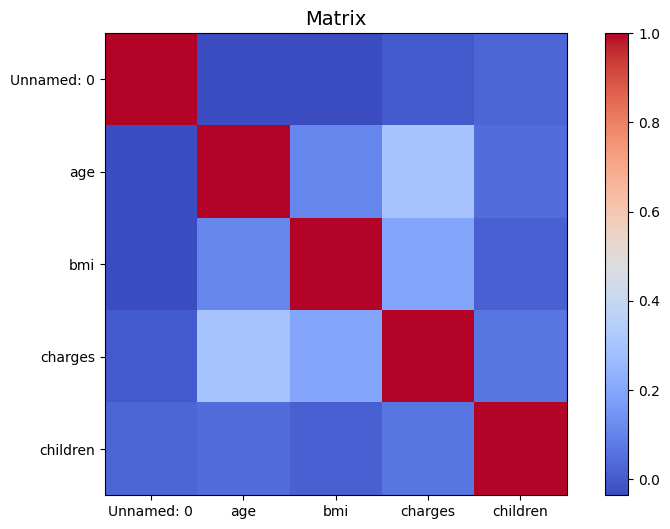

      age        kosten
543    54  76625.923612
1300   45  75186.807708
577    31  70354.384376
819    33  66231.012508
1146   60  63201.795268
...   ...           ...
1245   28   1133.533800
413    25   1025.799200
984    20    993.034970
166    20    977.526000
32     19    947.079400

[1338 rows x 2 columns]


In [7]:
%pip install pandas
%pip install matplotlib
import pandas as pd 
import matplotlib.pyplot as plt 

def rechnen (row):
    kosten = 0
    kosten += row["bmi"]
    kosten += row["age"]
    if row ["smoker"]=="yes":
        kosten += row["charges"]*1.2
    else:
        kosten += row ["charges"]
    if row ["children"]!=0:
        kosten = (kosten/row["children"])
    else:
        kosten=kosten
    
    return kosten

df = pd.read_csv("./insurance.csv")
relevant_columns = ["age","bmi","smoker","charges","children"]
cleaned = df[relevant_columns]
print (cleaned)
cleaned.to_csv("./cleaned_data.csv")

data = pd.read_csv("./cleaned_data.csv")
numeric_data = data.select_dtypes(["number"])

correlation = numeric_data.corr()
print("Matrix: ")
print(correlation)

plt.figure(figsize=(10,6))
plt.title("Matrix", fontsize = 14)
plt.imshow(correlation, cmap = "coolwarm", interpolation="none")
plt.colorbar()
plt.xticks(range(len(correlation.columns)), correlation.columns)
plt.yticks(range(len(correlation.columns)), correlation.columns)
plt.show()



data["kosten"] = data.apply(rechnen, axis=1)
print(data[["age","kosten"]].sort_values(by="kosten", ascending = False))